##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
pl.style.use('fivethirtyeight')
import json
import os
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from scipy import stats
from pandas.tools.plotting import scatter_matrix
URL = "http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data"

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [3]:
# Create a function with common parameters for reading these files
def read_excel(filename):
    # Use line 9 for the headers, column 0 for the row names and skip the last line.
    df = pd.read_excel(URL + filename, header=9, index_col=0, skip_footer=1)
    
    #Drop the first value and the 9th from the bottom, which are always NaN
    return df.drop(df.index[[0,-9]])

In [4]:
# Create a dict to hold the values and then read the excel files into the dict.
income = {
    'male': {
        'all': '/pinc08_2_1_1.xls',
        'white': '/pinc08_2_1_4.xls',
        'black': '/pinc08_2_1_6.xls',
        'hispanic': '/pinc08_2_1_9.xls',
        'asian': '/pinc08_2_1_8.xls',
    },
    'female': {
        'all': '/pinc08_3_1_1.xls',
        'white': '/pinc08_3_1_4.xls',
        'black': '/pinc08_3_1_6.xls',
        'hispanic': '/pinc08_3_1_9.xls',
        'asian': '/pinc08_3_1_8.xls',
    }
}

for gender, races in income.iteritems():
    for race, url in races.iteritems():
        races[race] = read_excel(url)

##exploratory phase

now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000183CE940>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000007EA190F0>]], dtype=object)

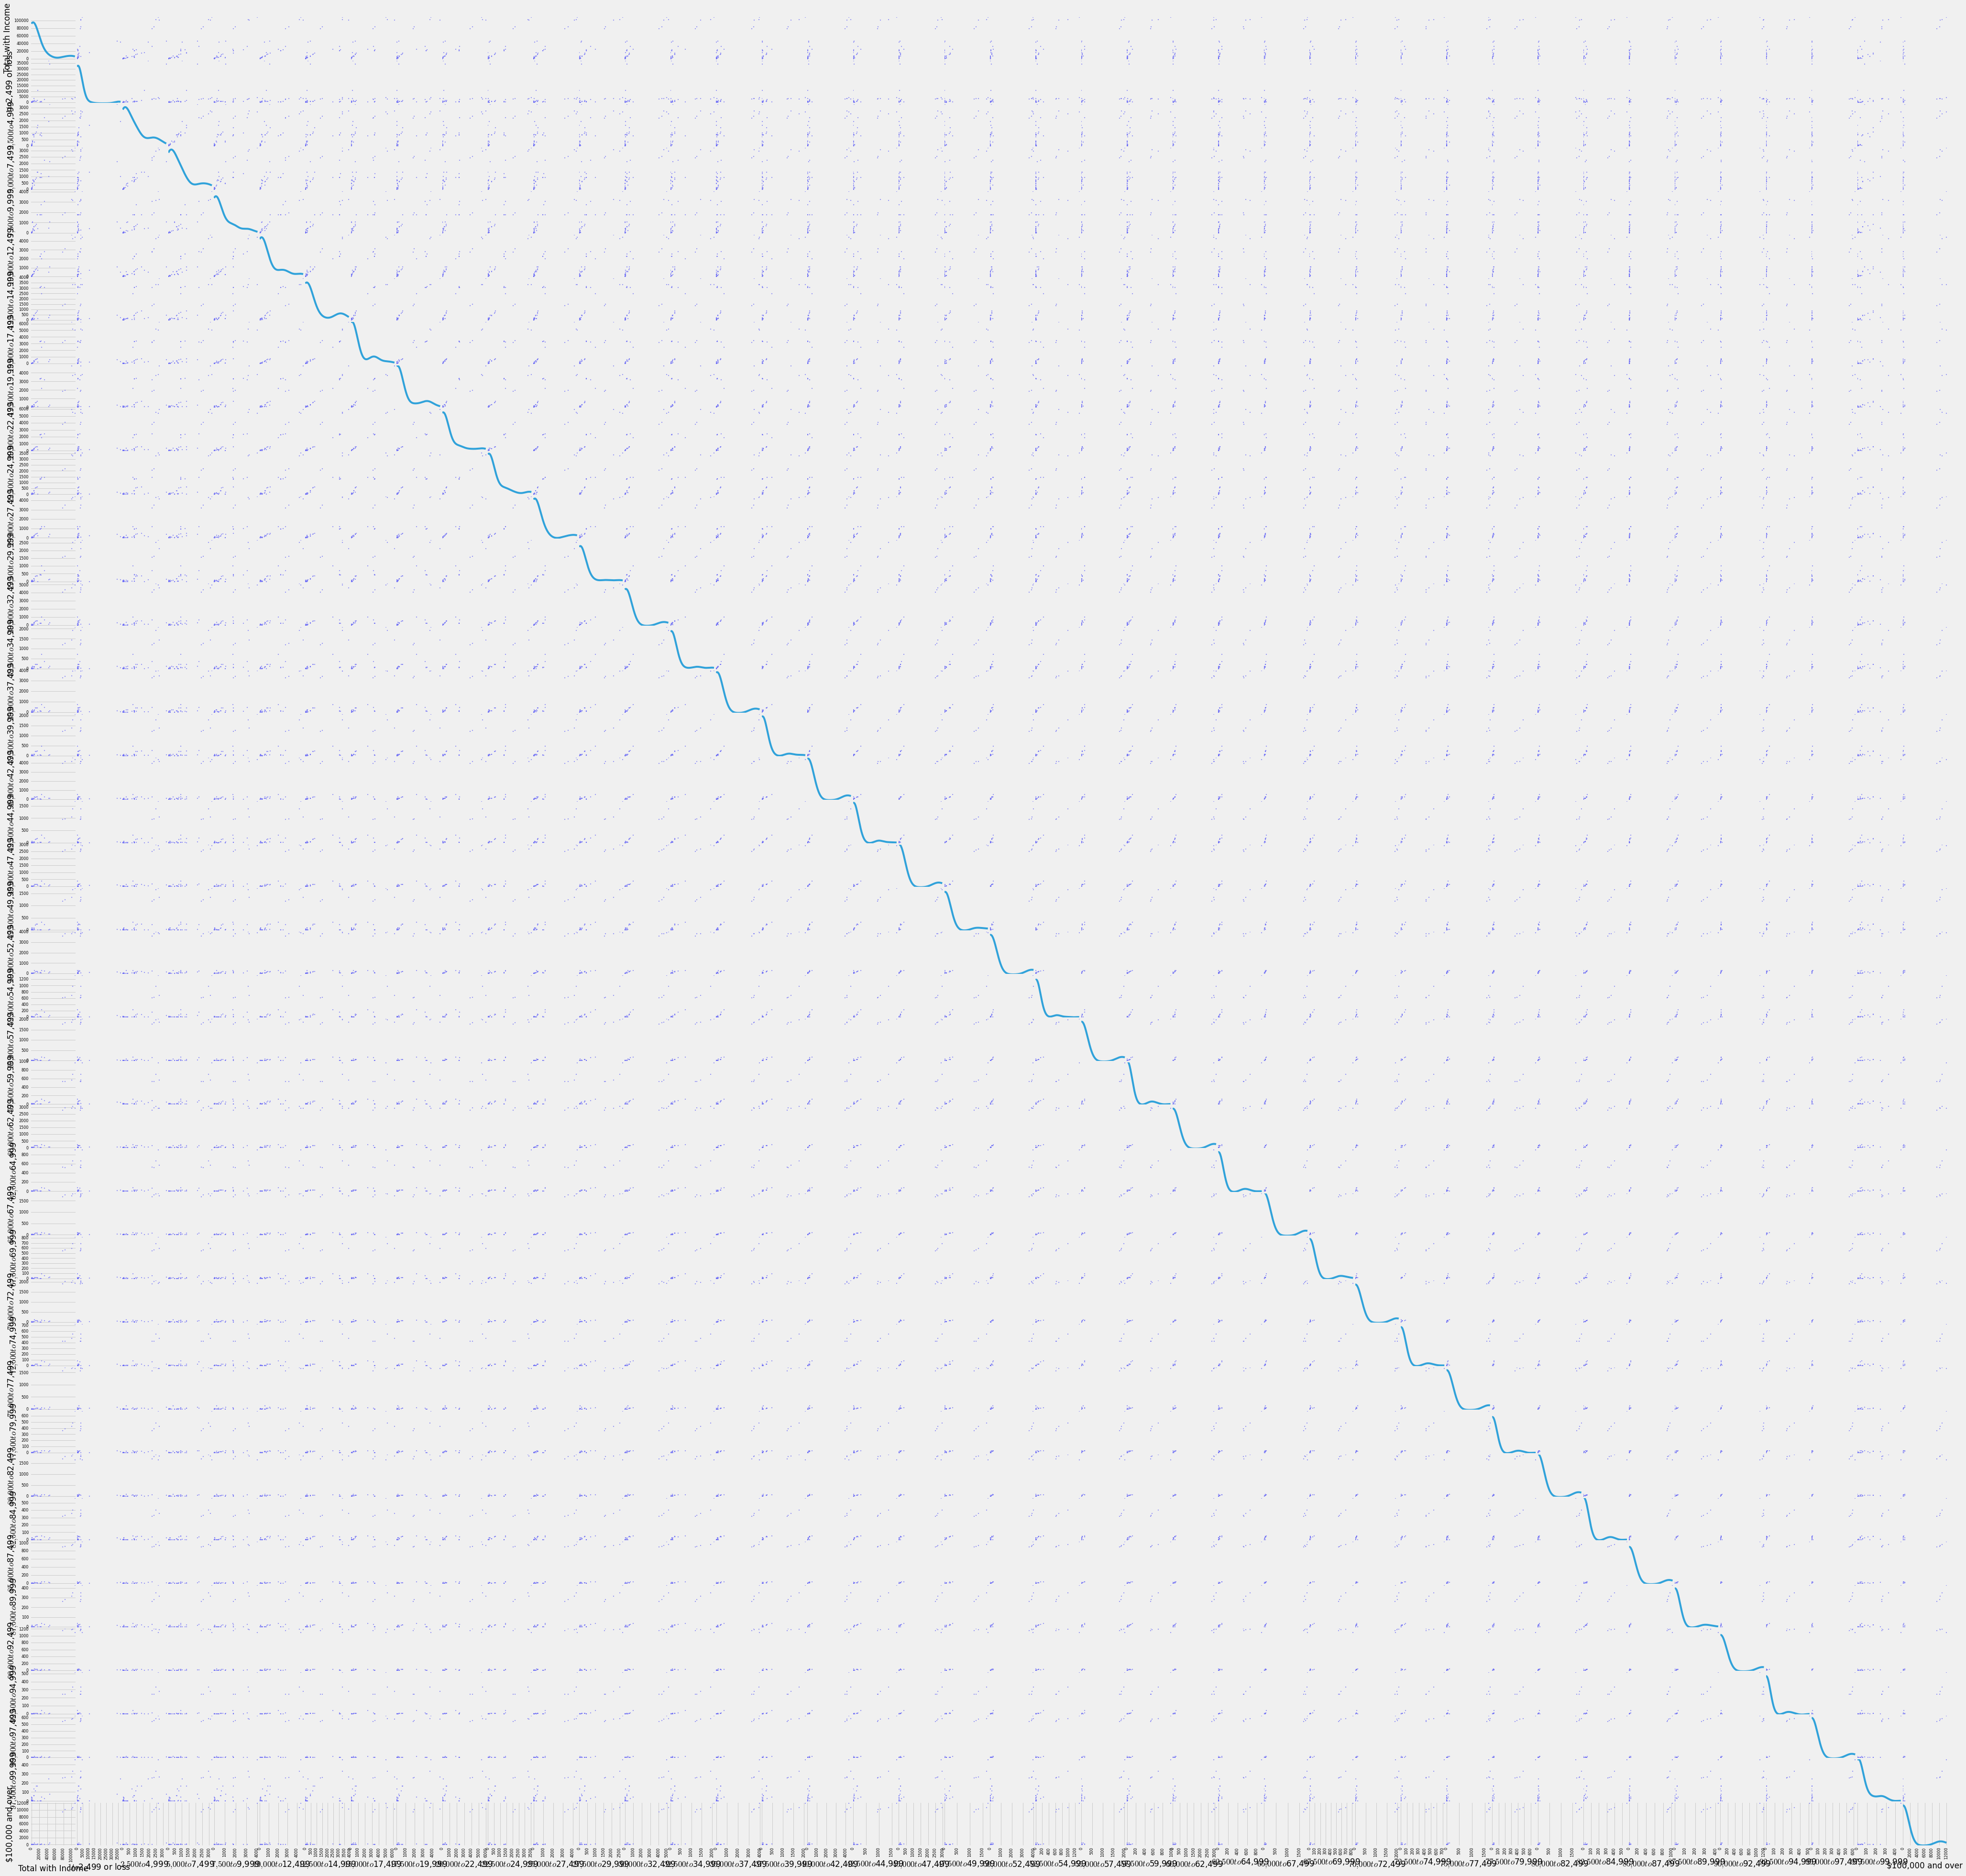

In [5]:
scatter_matrix (income['male']['all'], figsize=(64, 64), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000B7BF67F0>,
        ...,
        ...,
        ...,
       ..., 
        ...,
        ...,
        ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000001184392B0>]], dtype=object)

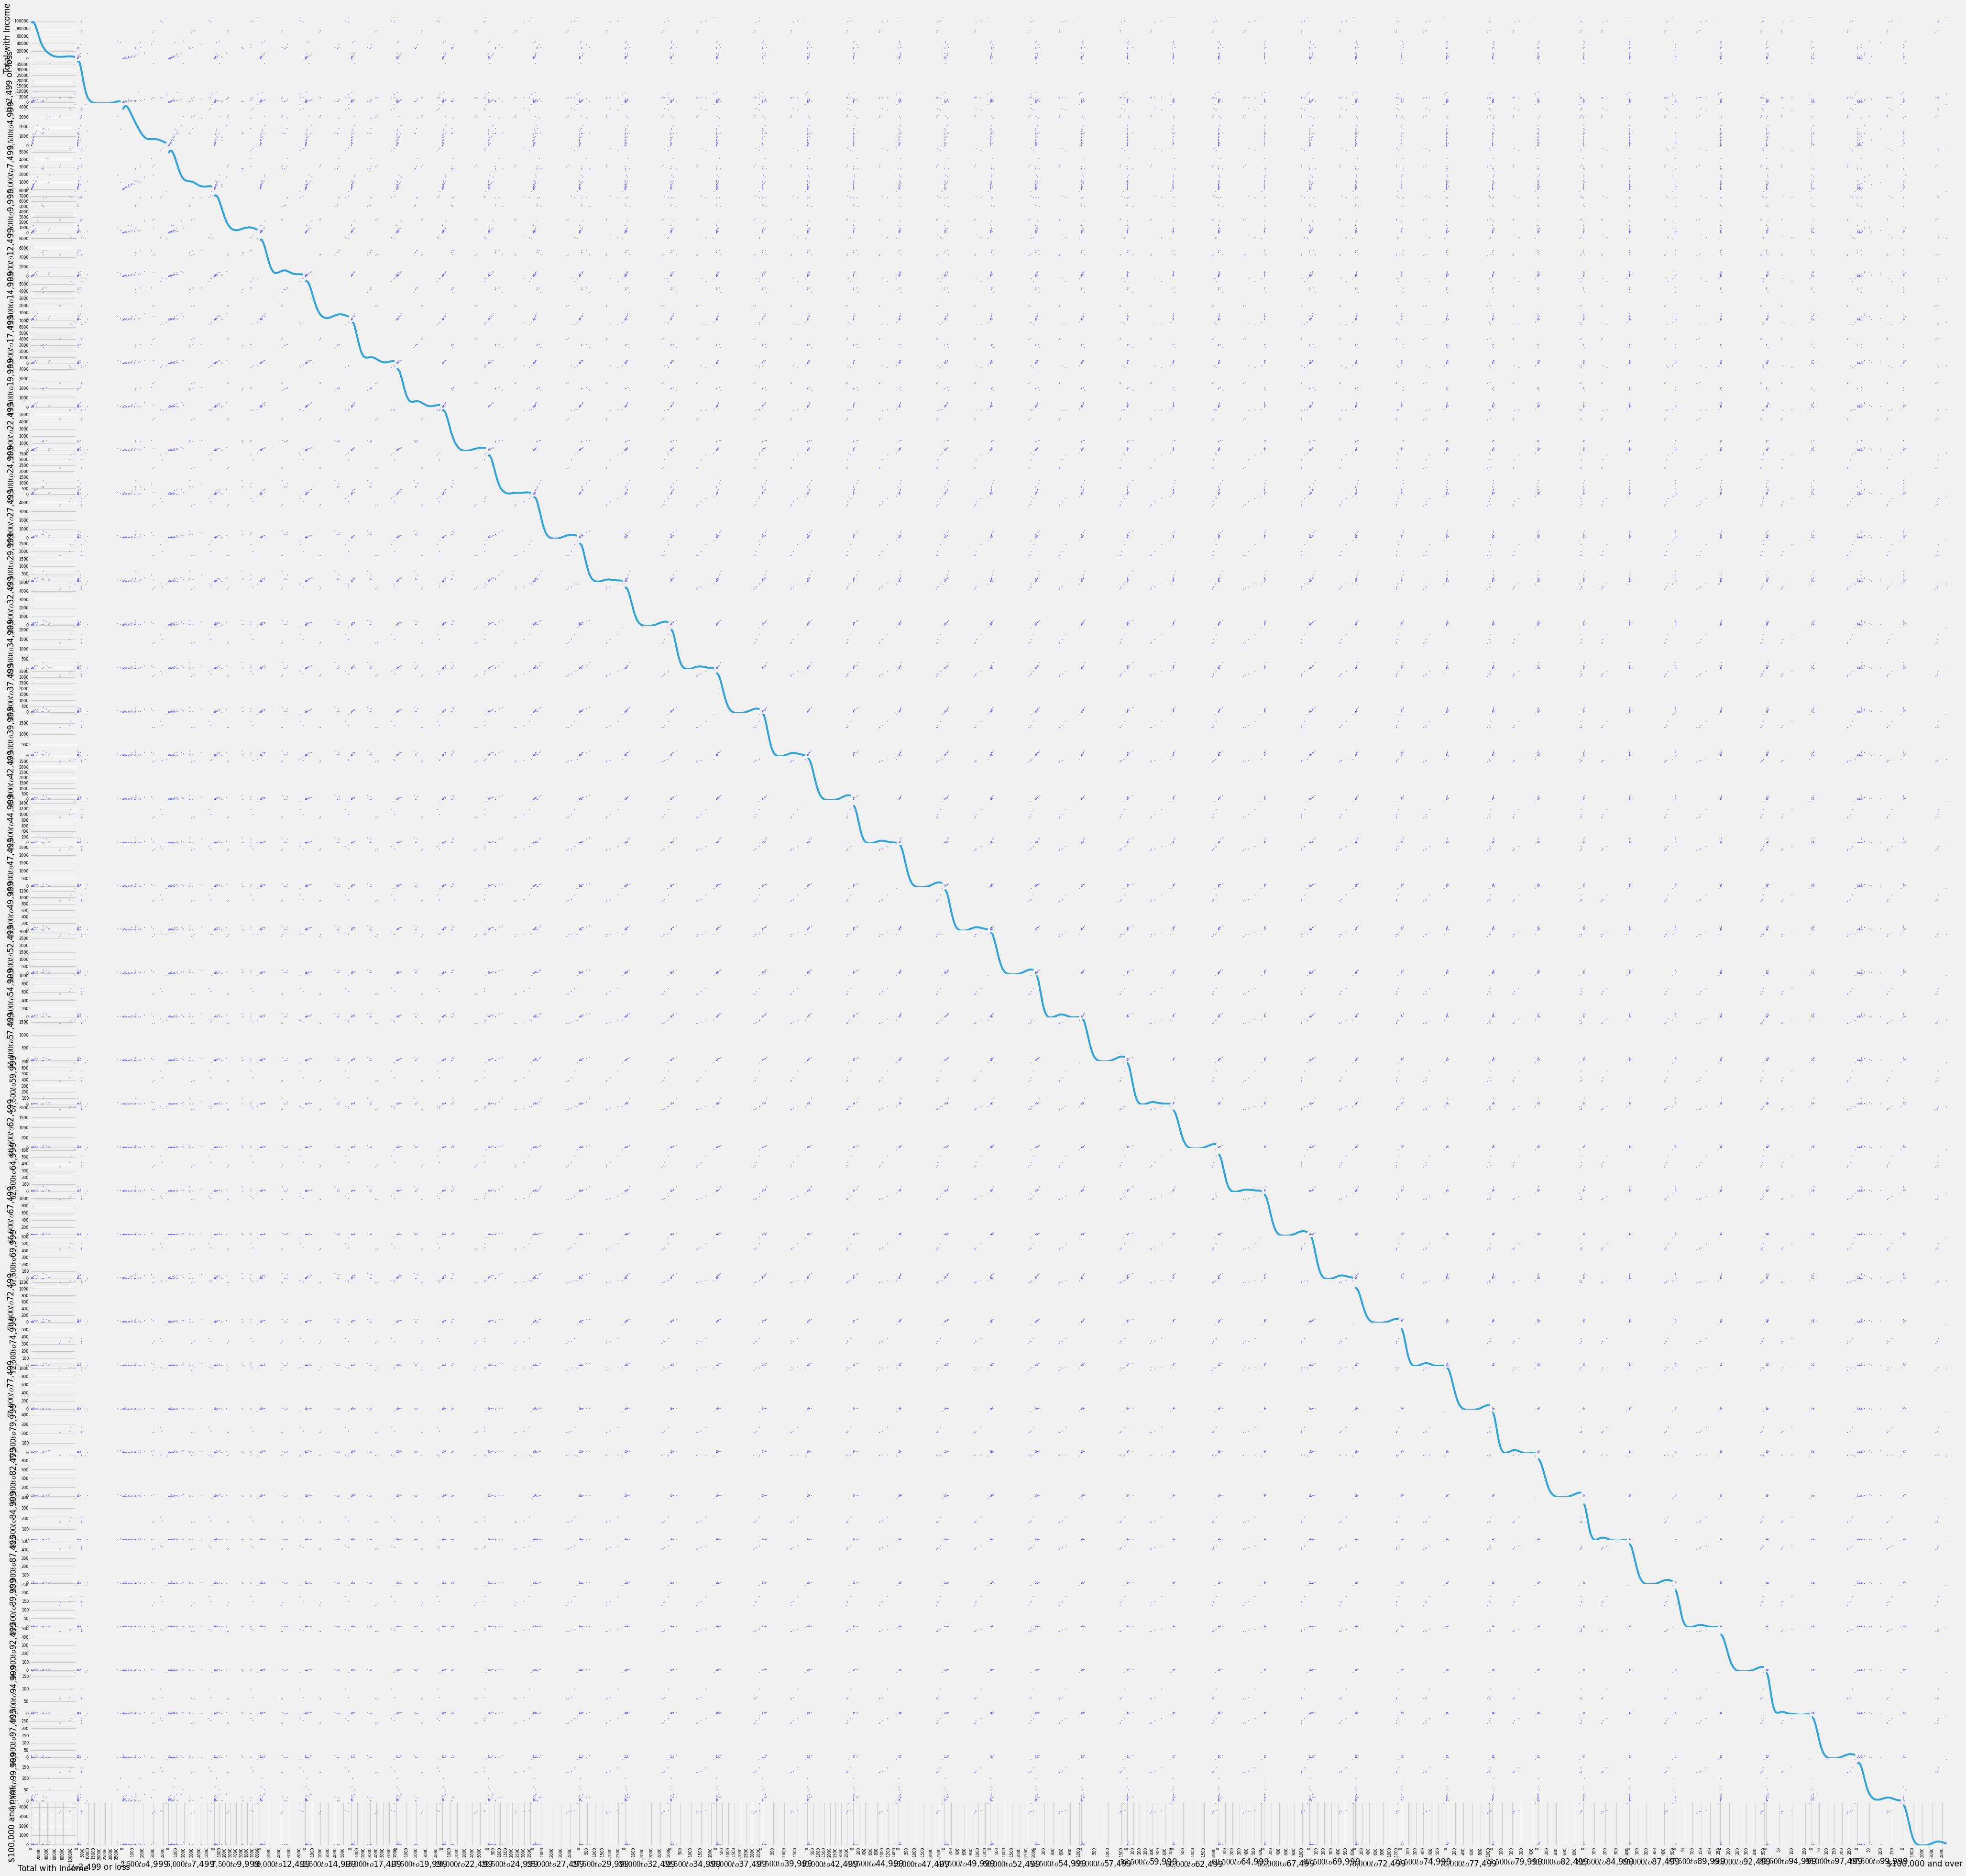

In [6]:
scatter_matrix (income['female']['all'], figsize=(64, 64), diagonal='kde')

(Right click -> View Image to zoom in)

Generally we see more correlation among income ranges that are closer together and less correlation among income ranges that are further apart.  

##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

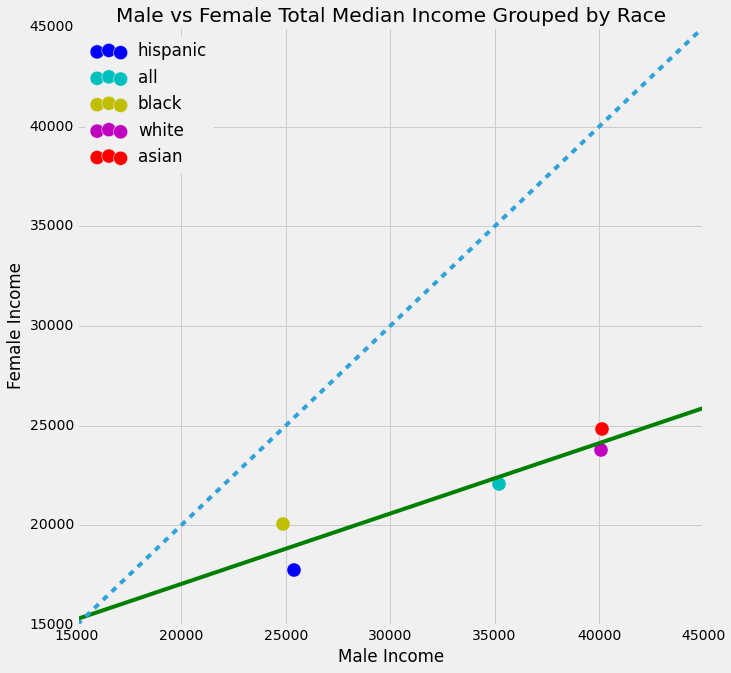

In [7]:
# Create arrays for the median incomes of each gender
median_income = {}
races = income['male'].keys()
for gender, races in income.iteritems():
    median_income[gender] = []
    for race, df in races.iteritems():
        median_income[gender].append(df['Median income'][0])

# Scatter plot
figure, ax = pl.subplots(figsize=(10,10))
colors = ['b', 'c', 'y', 'm', 'r']
points = []
races = income['male'].keys()
for i,race in enumerate(races):
    points.append(ax.scatter(
            income['male'][race]['Median income'][0], 
            income['female'][race]['Median income'][0], 
            c=colors[i], s=200
    ))

# Plot the best fit line
mod = smf.ols(formula='female ~ male', data = median_income).fit()
abline_plot(model_results=mod, ax=ax, color='green')

ax.set_xlim([15000, 45000])
ax.set_ylim([15000, 45000])
ax.set_title('Male vs Female Total Median Income Grouped by Race')
ax.set_xlabel('Male Income')
ax.set_ylabel('Female Income')

# Plot the x=y line
ax.plot(ax.get_xlim(), ax.get_ylim(), '--')
ax.legend(points, races, loc='upper left')

##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [8]:
# Create masked arrays with all the values of all races combined.  
all_males_ma = np.ma.array(np.concatenate([income['male'][race]['Median income'].values for race in races]))
all_females_ma = np.ma.array(np.concatenate([income['female'][race]['Median income'].values for race in races]))

# Create the mask for values which are (B)
all_males_ma.mask = all_females_ma.mask = ((all_males_ma == '(B)') + (all_females_ma == '(B)'))

# Get the arrays without the invalid values
all_males = all_males_ma.compressed()
all_females = all_females_ma.compressed()

In [9]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

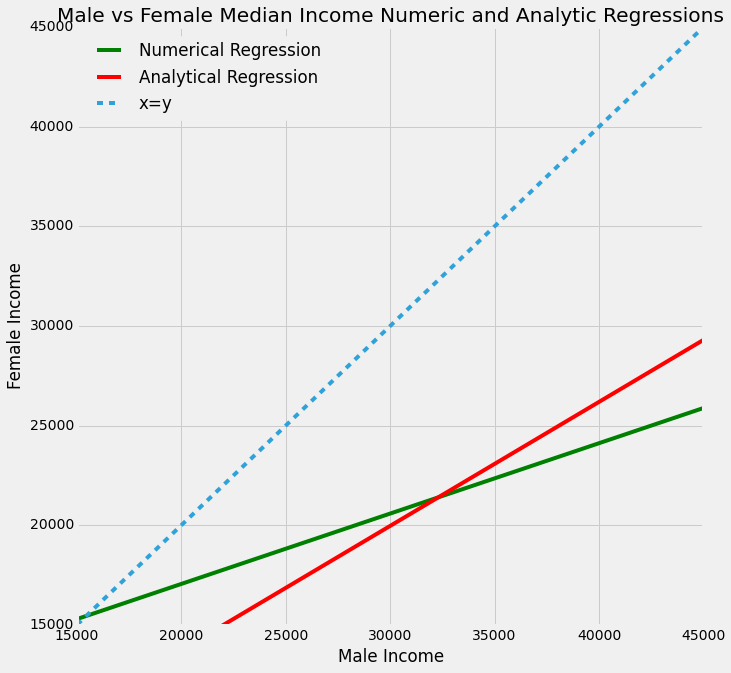

In [10]:
# Set up plot
figure, ax = pl.subplots(figsize=(10,10))
ax.set_xlim([15000, 45000])
ax.set_ylim([15000, 45000])
ax.set_title('Male vs Female Median Income Numeric and Analytic Regressions')
ax.set_xlabel('Male Income')
ax.set_ylabel('Female Income')

# Plot OLS regression line
abline_plot(model_results=mod, ax=ax, color='green')

# Plot analytic regression line
x = np.array([10000, 50000])
y = beta1*x + beta0
ax.plot(x, y, 'r-')

# Plot x=y
ax.plot(ax.get_xlim(), ax.get_ylim(), '--')

# Add legend
ax.legend(ax.get_lines(), ['Numerical Regression', 'Analytical Regression', 'x=y'], loc='upper left')

##Now pick a stipend, maybe your ideal stipend? 
##and predict what a woman in a position where a man recieves your ideal stipend would make



In [11]:
# Using the analyic regression, assuming $75,000 for a man
beta1*75000 + beta0

47969.626976754633

##lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

For both men and women, Black and Hispanic people make less than either White or Asians.  In fact, the income gap between men and women is smaller among Blacks and Hispanics.